In [ ]:
题目：寻找关键用户和分析社交关系
data.json 数据描述
1. 用户节点数据包含用户ID和他们的"影响力分数"，格式为["用户名称", 影响力分数]。
2. 边关系数据包含每两个用户之间的连接强度（即边的权重），格式为["用户名称1", "用户名称2", 关系权重]。
例如：
节点：["Yanyan-Wang", 50.95], ["Aarebecca", 23.82], ...
边：["Yanyan-Wang", "Aarebecca", 25.3], ["Yanyan-Wang", "pomelo-nwu", 25.09], ...
问题
1. 社交网络构建与分析
a. 使用邻接矩阵或者字典表示法来表示这个社交关系网络。
b. 请找出每个用户的直接朋友（即与其存在边关系的节点），并用列表形式列出。
2. 统计与度中心性分析
a. 计算每个用户的度数（即直接朋友数量），列出度数最多的前5个用户及其朋友数量。
b. 通过影响力分数（如上所示），找出影响力最高的前5个用户。
c. 综合考虑影响力分数和朋友数量，列出对社交网络最有影响力的用户（可以选择将两者按一定比例加权，例如影响力得分的50%和朋友数量的50%）。
3. 推荐新朋友
a. 对于用户 Yanyan-Wang，请找出其“朋友的朋友”中最有可能成为新朋友的用户，并列出推荐的理由（例如有最多共同的朋友）。
b. 考虑用户之间的连接强度，找出与 Yanyan-Wang 连接强度最高的5个用户（无论是否已经是直接朋友），并列出推荐排序。
4. 网络图的可视化
a. 使用图论可视化工具绘制用户关系网络图，展示关键用户和他们的连接情况。
b. 你可以对图中的节点按“影响力得分”进行着色，节点的大小则代表度数，尝试解释在图中哪些用户在社交网络中最具影响力。

In [10]:
#1. 社交网络构建与分析
#a. 使用邻接矩阵或者字典表示法来表示这个社交关系网络。
#b. 请找出每个用户的直接朋友（即与其存在边关系的节点），并用列表形式列出。
import json
from collections import defaultdict

data = {
    "nodes": [ 
        ["Yanyan-Wang", 50.95], ["Aarebecca", 23.82], ["pomelo-nwu", 22.36],
        ["tyn1998", 16.64], ["frank-zsy", 15.8], ["will-ww", 13.5],
        ["zhicheng-ning", 8.35], ["xgdyp", 7.58], ["stevending1st", 6.28],
        ["andyhuang18", 6.27], ["Zzzzzhuzhiwei", 6.21], ["wxharry", 4.79],
        ["bifenglin", 4.01], ["yangzy0603", 3.83], ["lidongze0629", 3.73],
        ["wj23027", 3.56], ["PureNatural", 3.37], ["kunal8411", 3.36],
        ["birdflyi", 3.28], ["lhbvvvvv", 3.12], ["xiaoya-yaya", 2.39],
        ["stealth-bombeer", 2.36], ["yikenie", 2.31], ["RackweLLizm", 2.28],
        ["pranavshuklaa", 1.79], ["Vlad116", 1.79], ["Maple0817", 1.63],
        ["yvonneyx", 1.22], ["yubo0923", 1.12], ["zhaosj975", 1],
        ["longyanz", 0.74]
    ],
    "edges":[["Yanyan-Wang","Aarebecca",25.3],["Yanyan-Wang","pomelo-nwu",25.09],["Aarebecca","pomelo-nwu",24.84],["andyhuang18","tyn1998",15.28],["yangzy0603","pomelo-nwu",13.85],["bifenglin","will-ww",13.32],["tyn1998","pomelo-nwu",12.48],["yangzy0603","Aarebecca",11.92],["tyn1998","frank-zsy",11.87],["yangzy0603","Yanyan-Wang",11.85],["wj23027","andyhuang18",11.03],["zhicheng-ning","will-ww",10.82],["wj23027","tyn1998",10.64],["tyn1998","bifenglin",9.84],["tyn1998","Yanyan-Wang",9.62],["Zzzzzhuzhiwei","frank-zsy",9.52],["tyn1998","will-ww",9.15],["Zzzzzhuzhiwei","will-ww",8.83],["xgdyp","frank-zsy",8.44],["andyhuang18","will-ww",8.19],["lidongze0629","pomelo-nwu",8.1],["Zzzzzhuzhiwei","tyn1998",7.93],["andyhuang18","zhicheng-ning",7.88],["lhbvvvvv","tyn1998",7.84],["PureNatural","bifenglin",7.75],["zhicheng-ning","tyn1998",7.73],["yvonneyx","Aarebecca",7.73],["Zzzzzhuzhiwei","xgdyp",7.71],["xgdyp","PureNatural",7.67],["yvonneyx","pomelo-nwu",7.63],["will-ww","frank-zsy",7.62],["xgdyp","bifenglin",7.61],["xiaoya-yaya","bifenglin",7.42],["yvonneyx","Yanyan-Wang",7.39],["Zzzzzhuzhiwei","lhbvvvvv",7.37],["tyn1998","PureNatural",7.32],["PureNatural","frank-zsy",7.29],["Yanyan-Wang","lidongze0629",7.25],["yangzy0603","tyn1998",7.15],["wj23027","zhicheng-ning",7.1],["lhbvvvvv","andyhuang18",7.07],["PureNatural","will-ww",7.06],["birdflyi","xgdyp",6.99],["xgdyp","tyn1998",6.96],["lhbvvvvv","will-ww",6.92],["tyn1998","stevending1st",6.85],["stevending1st","frank-zsy",6.84],["birdflyi","frank-zsy",6.71],["Aarebecca","lidongze0629",6.58],["wxharry","tyn1998",6.54],["Zzzzzhuzhiwei","PureNatural",6.49],["bifenglin","frank-zsy",6.4],["tyn1998","Aarebecca",6.4],["zhicheng-ning","bifenglin",6.34],["andyhuang18","frank-zsy",6.29],["wj23027","will-ww",6.26],["Zzzzzhuzhiwei","birdflyi",6.22],["xiaoya-yaya","will-ww",6.19],["xgdyp","will-ww",6.14],["Zzzzzhuzhiwei","zhicheng-ning",6.11],["birdflyi","bifenglin",6.04],["birdflyi","PureNatural",6.01],["lhbvvvvv","frank-zsy",5.92],["yangzy0603","yvonneyx",5.84],["Zzzzzhuzhiwei","bifenglin",5.79],["yangzy0603","lidongze0629",5.6],["andyhuang18","bifenglin",5.59],["andyhuang18","wxharry",5.53],["wj23027","frank-zsy",5.48],["zhicheng-ning","frank-zsy",5.33],["Zzzzzhuzhiwei","andyhuang18",5.31],["birdflyi","tyn1998",5.19],["xiaoya-yaya","tyn1998",5.09],["birdflyi","will-ww",4.97],["lhbvvvvv","zhicheng-ning",4.97],["RackweLLizm","pomelo-nwu",4.97],["Zzzzzhuzhiwei","stevending1st",4.96],["RackweLLizm","Aarebecca",4.84],["xiaoya-yaya","xgdyp",4.75],["yikenie","pomelo-nwu",4.66],["zhicheng-ning","PureNatural",4.63],["yikenie","Aarebecca",4.55],["Zzzzzhuzhiwei","wj23027",4.53],["RackweLLizm","Yanyan-Wang",4.5],["lhbvvvvv","wj23027",4.43],["yangzy0603","RackweLLizm",4.29],["andyhuang18","stevending1st",4.28],["yikenie","Yanyan-Wang",4.25],["zhicheng-ning","xgdyp",4.23],["pranavshuklaa","tyn1998",4.19],["xiaoya-yaya","PureNatural",4.15],["xiaoya-yaya","zhicheng-ning",4.11],["bifenglin","pomelo-nwu",4.11],["tyn1998","lidongze0629",4.1],["lhbvvvvv","wxharry",4.08],["yangzy0603","yikenie",4.06],["longyanz","bifenglin",3.97],["pomelo-nwu","frank-zsy",3.96],["pranavshuklaa","wxharry",3.95],["yvonneyx","lidongze0629",3.93],["xgdyp","stevending1st",3.91],["yubo0923","pomelo-nwu",3.9],["yvonneyx","tyn1998",3.87],["wj23027","pomelo-nwu",3.86],["andyhuang18","PureNatural",3.83],["yubo0923","Aarebecca",3.82],["pranavshuklaa","andyhuang18",3.75],["longyanz","will-ww",3.69],["Zzzzzhuzhiwei","xiaoya-yaya",3.69],["lhbvvvvv","PureNatural",3.66],["wj23027","bifenglin",3.62],["yubo0923","Yanyan-Wang",3.61],["andyhuang18","pomelo-nwu",3.56],["lhbvvvvv","bifenglin",3.55],["lhbvvvvv","stevending1st",3.54],["stevending1st","will-ww",3.51],["stealth-bombeer","tyn1998",3.51],["birdflyi","stevending1st",3.48],["yangzy0603","yubo0923",3.47],["RackweLLizm","lidongze0629",3.4],["wj23027","stevending1st",3.37],["PureNatural","stevending1st",3.36],["stealth-bombeer","wxharry",3.35],["RackweLLizm","tyn1998",3.35],["xiaoya-yaya","birdflyi",3.33],["Maple0817","pomelo-nwu",3.32],["will-ww","pomelo-nwu",3.27],["Maple0817","Aarebecca",3.27],["yikenie","lidongze0629",3.26],["yvonneyx","RackweLLizm",3.24],["lhbvvvvv","xgdyp",3.23],["yikenie","tyn1998",3.21],["stealth-bombeer","andyhuang18",3.2],["Yanyan-Wang","Maple0817",3.11],["yvonneyx","yikenie",3.11],["zhicheng-ning","stevending1st",3.07],["tyn1998","Vlad116",3.05],["pranavshuklaa","lhbvvvvv",3.02],["birdflyi","zhicheng-ning",3.01],["yangzy0603","Maple0817",3.01],["longyanz","tyn1998",2.96],["longyanz","xiaoya-yaya",2.94],["wxharry","Vlad116",2.93],["yubo0923","lidongze0629",2.86],["xiaoya-yaya","frank-zsy",2.84],["zhaosj975","tyn1998",2.84],["yubo0923","tyn1998",2.83],["andyhuang18","Vlad116",2.81],["kunal8411","andyhuang18",2.78],["lhbvvvvv","birdflyi",2.78],["RackweLLizm","yikenie",2.77],["yubo0923","yvonneyx",2.75],["kunal8411","wj23027",2.74],["longyanz","zhicheng-ning",2.72],["stevending1st","bifenglin",2.71],["lhbvvvvv","stealth-bombeer",2.66],["pranavshuklaa","stealth-bombeer",2.6],["Maple0817","lidongze0629",2.54],["zhicheng-ning","pomelo-nwu",2.52],["tyn1998","Maple0817",2.51],["yubo0923","RackweLLizm",2.48],["andyhuang18","xgdyp",2.47],["yvonneyx","Maple0817",2.45],["yubo0923","yikenie",2.4],["lhbvvvvv","Vlad116",2.38],["PureNatural","pomelo-nwu",2.36],["wj23027","Yanyan-Wang",2.34],["longyanz","xgdyp",2.34],["pranavshuklaa","Vlad116",2.34],["longyanz","andyhuang18",2.33],["kunal8411","tyn1998",2.32],["xiaoya-yaya","andyhuang18",2.28],["longyanz","PureNatural",2.26],["xiaoya-yaya","pomelo-nwu",2.24],["RackweLLizm","Maple0817",2.23],["Zzzzzhuzhiwei","wxharry",2.22],["wj23027","PureNatural",2.21],["yikenie","Maple0817",2.17],["stealth-bombeer","Vlad116",2.11],["xgdyp","pomelo-nwu",2.1],["longyanz","pomelo-nwu",2.1],["Yanyan-Wang","frank-zsy",2.1],["wxharry","stevending1st",2.03],["kunal8411","zhicheng-ning",2.02],["yubo0923","Maple0817",1.99],["lhbvvvvv","xiaoya-yaya",1.98],["wj23027","xgdyp",1.87],["Zzzzzhuzhiwei","pranavshuklaa",1.87],["wj23027","xiaoya-yaya",1.85],["longyanz","wj23027",1.83],["yangzy0603","frank-zsy",1.77],["pranavshuklaa","stevending1st",1.73],["Zzzzzhuzhiwei","stealth-bombeer",1.72],["wj23027","wxharry",1.71],["kunal8411","stevending1st",1.69],["xiaoya-yaya","stevending1st",1.69],["zhaosj975","will-ww",1.65],["Zzzzzhuzhiwei","Vlad116",1.6],["stealth-bombeer","stevending1st",1.6],["Zzzzzhuzhiwei","longyanz",1.59],["zhaosj975","andyhuang18",1.56],["zhaosj975","bifenglin",1.54],["andyhuang18","birdflyi",1.51],["wxharry","frank-zsy",1.51],["Zzzzzhuzhiwei","pomelo-nwu",1.5],["Vlad116","stevending1st",1.5],["pranavshuklaa","wj23027",1.49],["zhaosj975","PureNatural",1.43],["stealth-bombeer","wj23027",1.4],["longyanz","birdflyi",1.36],["pranavshuklaa","frank-zsy",1.34],["birdflyi","pomelo-nwu",1.33],["wj23027","Vlad116",1.32],["yangzy0603","wj23027",1.31],["zhaosj975","zhicheng-ning",1.26],["stealth-bombeer","frank-zsy",1.26],["wj23027","birdflyi",1.25],["kunal8411","frank-zsy",1.2],["Vlad116","frank-zsy",1.2],["andyhuang18","Yanyan-Wang",1.14],["lhbvvvvv","pomelo-nwu",1.09],["zhaosj975","frank-zsy",1.09],["lhbvvvvv","zhaosj975",1.09],["zhaosj975","pomelo-nwu",1],["zhaosj975","wj23027",1],["Aarebecca","frank-zsy",0.97],["zhaosj975","xgdyp",0.93],["lhbvvvvv","longyanz",0.89],["lidongze0629","frank-zsy",0.89],["longyanz","frank-zsy",0.89],["yvonneyx","frank-zsy",0.88],["Yanyan-Wang","bifenglin",0.86],["RackweLLizm","frank-zsy",0.85],["yikenie","frank-zsy",0.84],["yangzy0603","andyhuang18",0.83],["longyanz","zhaosj975",0.83],["yubo0923","frank-zsy",0.81],["kunal8411","will-ww",0.79],["Maple0817","frank-zsy",0.78],["yangzy0603","bifenglin",0.67],["zhaosj975","birdflyi",0.67],["zhaosj975","xiaoya-yaya",0.67],["Zzzzzhuzhiwei","zhaosj975",0.67]]
}

network = defaultdict(dict)

for edge in data['edges']:
    user1, user2, weight = edge
    network[user1][user2] = weight
    network[user2][user1] = weight

# a
print("社交网络表示：")
print(network)
print()

# b
friends_list = {user: list(friends.keys()) for user, friends in network.items()}

print("每个用户的直接朋友：")
print(friends_list)


社交网络表示：
defaultdict(<class 'dict'>, {'Yanyan-Wang': {'Aarebecca': 25.3, 'pomelo-nwu': 25.09, 'yangzy0603': 11.85, 'tyn1998': 9.62, 'yvonneyx': 7.39, 'lidongze0629': 7.25, 'RackweLLizm': 4.5, 'yikenie': 4.25, 'yubo0923': 3.61, 'Maple0817': 3.11, 'wj23027': 2.34, 'frank-zsy': 2.1, 'andyhuang18': 1.14, 'bifenglin': 0.86}, 'Aarebecca': {'Yanyan-Wang': 25.3, 'pomelo-nwu': 24.84, 'yangzy0603': 11.92, 'yvonneyx': 7.73, 'lidongze0629': 6.58, 'tyn1998': 6.4, 'RackweLLizm': 4.84, 'yikenie': 4.55, 'yubo0923': 3.82, 'Maple0817': 3.27, 'frank-zsy': 0.97}, 'pomelo-nwu': {'Yanyan-Wang': 25.09, 'Aarebecca': 24.84, 'yangzy0603': 13.85, 'tyn1998': 12.48, 'lidongze0629': 8.1, 'yvonneyx': 7.63, 'RackweLLizm': 4.97, 'yikenie': 4.66, 'bifenglin': 4.11, 'frank-zsy': 3.96, 'yubo0923': 3.9, 'wj23027': 3.86, 'andyhuang18': 3.56, 'Maple0817': 3.32, 'will-ww': 3.27, 'zhicheng-ning': 2.52, 'PureNatural': 2.36, 'xiaoya-yaya': 2.24, 'xgdyp': 2.1, 'longyanz': 2.1, 'Zzzzzhuzhiwei': 1.5, 'birdflyi': 1.33, 'lhbvvvvv': 1

In [19]:
#2. 统计与度中心性分析
#a. 计算每个用户的度数（即直接朋友数量），列出度数最多的前5个用户及其朋友数量。
#b. 通过影响力分数（如上所示），找出影响力最高的前5个用户。
#c. 综合考虑影响力分数和朋友数量，列出对社交网络最有影响力的用户（可以选择将两者按一定比例加权，例如影响力得分的50%和朋友数量的50%）。

import json
from collections import defaultdict

data = json.loads('{"nodes":[["Yanyan-Wang",50.95],["Aarebecca",23.82],["pomelo-nwu",22.36],["tyn1998",16.64],["frank-zsy",15.8],["will-ww",13.5],["zhicheng-ning",8.35],["xgdyp",7.58],["stevending1st",6.28],["andyhuang18",6.27],["Zzzzzhuzhiwei",6.21],["wxharry",4.79],["bifenglin",4.01],["yangzy0603",3.83],["lidongze0629",3.73],["wj23027",3.56],["PureNatural",3.37],["kunal8411",3.36],["birdflyi",3.28],["lhbvvvvv",3.12],["xiaoya-yaya",2.39],["stealth-bombeer",2.36],["yikenie",2.31],["RackweLLizm",2.28],["pranavshuklaa",1.79],["Vlad116",1.79],["Maple0817",1.63],["yvonneyx",1.22],["yubo0923",1.12],["zhaosj975",1],["longyanz",0.74]],"edges":[["Yanyan-Wang","Aarebecca",25.3],["Yanyan-Wang","pomelo-nwu",25.09],["Aarebecca","pomelo-nwu",24.84],["andyhuang18","tyn1998",15.28],["yangzy0603","pomelo-nwu",13.85],["bifenglin","will-ww",13.32],["tyn1998","pomelo-nwu",12.48],["yangzy0603","Aarebecca",11.92],["tyn1998","frank-zsy",11.87],["yangzy0603","Yanyan-Wang",11.85],["wj23027","andyhuang18",11.03],["zhicheng-ning","will-ww",10.82],["wj23027","tyn1998",10.64],["tyn1998","bifenglin",9.84],["tyn1998","Yanyan-Wang",9.62],["Zzzzzhuzhiwei","frank-zsy",9.52],["tyn1998","will-ww",9.15],["Zzzzzhuzhiwei","will-ww",8.83],["xgdyp","frank-zsy",8.44],["andyhuang18","will-ww",8.19],["lidongze0629","pomelo-nwu",8.1],["Zzzzzhuzhiwei","tyn1998",7.93],["andyhuang18","zhicheng-ning",7.88],["lhbvvvvv","tyn1998",7.84],["PureNatural","bifenglin",7.75],["zhicheng-ning","tyn1998",7.73],["yvonneyx","Aarebecca",7.73],["Zzzzzhuzhiwei","xgdyp",7.71],["xgdyp","PureNatural",7.67],["yvonneyx","pomelo-nwu",7.63],["will-ww","frank-zsy",7.62],["xgdyp","bifenglin",7.61],["xiaoya-yaya","bifenglin",7.42],["yvonneyx","Yanyan-Wang",7.39],["Zzzzzhuzhiwei","lhbvvvvv",7.37],["tyn1998","PureNatural",7.32],["PureNatural","frank-zsy",7.29],["Yanyan-Wang","lidongze0629",7.25],["yangzy0603","tyn1998",7.15],["wj23027","zhicheng-ning",7.1],["lhbvvvvv","andyhuang18",7.07],["PureNatural","will-ww",7.06],["birdflyi","xgdyp",6.99],["xgdyp","tyn1998",6.96],["lhbvvvvv","will-ww",6.92],["tyn1998","stevending1st",6.85],["stevending1st","frank-zsy",6.84],["birdflyi","frank-zsy",6.71],["Aarebecca","lidongze0629",6.58],["wxharry","tyn1998",6.54],["Zzzzzhuzhiwei","PureNatural",6.49],["bifenglin","frank-zsy",6.4],["tyn1998","Aarebecca",6.4],["zhicheng-ning","bifenglin",6.34],["andyhuang18","frank-zsy",6.29],["wj23027","will-ww",6.26],["Zzzzzhuzhiwei","birdflyi",6.22],["xiaoya-yaya","will-ww",6.19],["xgdyp","will-ww",6.14],["Zzzzzhuzhiwei","zhicheng-ning",6.11],["birdflyi","bifenglin",6.04],["birdflyi","PureNatural",6.01],["lhbvvvvv","frank-zsy",5.92],["yangzy0603","yvonneyx",5.84],["Zzzzzhuzhiwei","bifenglin",5.79],["yangzy0603","lidongze0629",5.6],["andyhuang18","bifenglin",5.59],["andyhuang18","wxharry",5.53],["wj23027","frank-zsy",5.48],["zhicheng-ning","frank-zsy",5.33],["Zzzzzhuzhiwei","andyhuang18",5.31],["birdflyi","tyn1998",5.19],["xiaoya-yaya","tyn1998",5.09],["birdflyi","will-ww",4.97],["lhbvvvvv","zhicheng-ning",4.97],["RackweLLizm","pomelo-nwu",4.97],["Zzzzzhuzhiwei","stevending1st",4.96],["RackweLLizm","Aarebecca",4.84],["xiaoya-yaya","xgdyp",4.75],["yikenie","pomelo-nwu",4.66],["zhicheng-ning","PureNatural",4.63],["yikenie","Aarebecca",4.55],["Zzzzzhuzhiwei","wj23027",4.53],["RackweLLizm","Yanyan-Wang",4.5],["lhbvvvvv","wj23027",4.43],["yangzy0603","RackweLLizm",4.29],["andyhuang18","stevending1st",4.28],["yikenie","Yanyan-Wang",4.25],["zhicheng-ning","xgdyp",4.23],["pranavshuklaa","tyn1998",4.19],["xiaoya-yaya","PureNatural",4.15],["xiaoya-yaya","zhicheng-ning",4.11],["bifenglin","pomelo-nwu",4.11],["tyn1998","lidongze0629",4.1],["lhbvvvvv","wxharry",4.08],["yangzy0603","yikenie",4.06],["longyanz","bifenglin",3.97],["pomelo-nwu","frank-zsy",3.96],["pranavshuklaa","wxharry",3.95],["yvonneyx","lidongze0629",3.93],["xgdyp","stevending1st",3.91],["yubo0923","pomelo-nwu",3.9],["yvonneyx","tyn1998",3.87],["wj23027","pomelo-nwu",3.86],["andyhuang18","PureNatural",3.83],["yubo0923","Aarebecca",3.82],["pranavshuklaa","andyhuang18",3.75],["longyanz","will-ww",3.69],["Zzzzzhuzhiwei","xiaoya-yaya",3.69],["lhbvvvvv","PureNatural",3.66],["wj23027","bifenglin",3.62],["yubo0923","Yanyan-Wang",3.61],["andyhuang18","pomelo-nwu",3.56],["lhbvvvvv","bifenglin",3.55],["lhbvvvvv","stevending1st",3.54],["stevending1st","will-ww",3.51],["stealth-bombeer","tyn1998",3.51],["birdflyi","stevending1st",3.48],["yangzy0603","yubo0923",3.47],["RackweLLizm","lidongze0629",3.4],["wj23027","stevending1st",3.37],["PureNatural","stevending1st",3.36],["stealth-bombeer","wxharry",3.35],["RackweLLizm","tyn1998",3.35],["xiaoya-yaya","birdflyi",3.33],["Maple0817","pomelo-nwu",3.32],["will-ww","pomelo-nwu",3.27],["Maple0817","Aarebecca",3.27],["yikenie","lidongze0629",3.26],["yvonneyx","RackweLLizm",3.24],["lhbvvvvv","xgdyp",3.23],["yikenie","tyn1998",3.21],["stealth-bombeer","andyhuang18",3.2],["Yanyan-Wang","Maple0817",3.11],["yvonneyx","yikenie",3.11],["zhicheng-ning","stevending1st",3.07],["tyn1998","Vlad116",3.05],["pranavshuklaa","lhbvvvvv",3.02],["birdflyi","zhicheng-ning",3.01],["yangzy0603","Maple0817",3.01],["longyanz","tyn1998",2.96],["longyanz","xiaoya-yaya",2.94],["wxharry","Vlad116",2.93],["yubo0923","lidongze0629",2.86],["xiaoya-yaya","frank-zsy",2.84],["zhaosj975","tyn1998",2.84],["yubo0923","tyn1998",2.83],["andyhuang18","Vlad116",2.81],["kunal8411","andyhuang18",2.78],["lhbvvvvv","birdflyi",2.78],["RackweLLizm","yikenie",2.77],["yubo0923","yvonneyx",2.75],["kunal8411","wj23027",2.74],["longyanz","zhicheng-ning",2.72],["stevending1st","bifenglin",2.71],["lhbvvvvv","stealth-bombeer",2.66],["pranavshuklaa","stealth-bombeer",2.6],["Maple0817","lidongze0629",2.54],["zhicheng-ning","pomelo-nwu",2.52],["tyn1998","Maple0817",2.51],["yubo0923","RackweLLizm",2.48],["andyhuang18","xgdyp",2.47],["yvonneyx","Maple0817",2.45],["yubo0923","yikenie",2.4],["lhbvvvvv","Vlad116",2.38],["PureNatural","pomelo-nwu",2.36],["wj23027","Yanyan-Wang",2.34],["longyanz","xgdyp",2.34],["pranavshuklaa","Vlad116",2.34],["longyanz","andyhuang18",2.33],["kunal8411","tyn1998",2.32],["xiaoya-yaya","andyhuang18",2.28],["longyanz","PureNatural",2.26],["xiaoya-yaya","pomelo-nwu",2.24],["RackweLLizm","Maple0817",2.23],["Zzzzzhuzhiwei","wxharry",2.22],["wj23027","PureNatural",2.21],["yikenie","Maple0817",2.17],["stealth-bombeer","Vlad116",2.11],["xgdyp","pomelo-nwu",2.1],["longyanz","pomelo-nwu",2.1],["Yanyan-Wang","frank-zsy",2.1],["wxharry","stevending1st",2.03],["kunal8411","zhicheng-ning",2.02],["yubo0923","Maple0817",1.99],["lhbvvvvv","xiaoya-yaya",1.98],["wj23027","xgdyp",1.87],["Zzzzzhuzhiwei","pranavshuklaa",1.87],["wj23027","xiaoya-yaya",1.85],["longyanz","wj23027",1.83],["yangzy0603","frank-zsy",1.77],["pranavshuklaa","stevending1st",1.73],["Zzzzzhuzhiwei","stealth-bombeer",1.72],["wj23027","wxharry",1.71],["kunal8411","stevending1st",1.69],["xiaoya-yaya","stevending1st",1.69],["zhaosj975","will-ww",1.65],["Zzzzzhuzhiwei","Vlad116",1.6],["stealth-bombeer","stevending1st",1.6],["Zzzzzhuzhiwei","longyanz",1.59],["zhaosj975","andyhuang18",1.56],["zhaosj975","bifenglin",1.54],["andyhuang18","birdflyi",1.51],["wxharry","frank-zsy",1.51],["Zzzzzhuzhiwei","pomelo-nwu",1.5],["Vlad116","stevending1st",1.5],["pranavshuklaa","wj23027",1.49],["zhaosj975","PureNatural",1.43],["stealth-bombeer","wj23027",1.4],["longyanz","birdflyi",1.36],["pranavshuklaa","frank-zsy",1.34],["birdflyi","pomelo-nwu",1.33],["wj23027","Vlad116",1.32],["yangzy0603","wj23027",1.31],["zhaosj975","zhicheng-ning",1.26],["stealth-bombeer","frank-zsy",1.26],["wj23027","birdflyi",1.25],["kunal8411","frank-zsy",1.2],["Vlad116","frank-zsy",1.2],["andyhuang18","Yanyan-Wang",1.14],["lhbvvvvv","pomelo-nwu",1.09],["zhaosj975","frank-zsy",1.09],["lhbvvvvv","zhaosj975",1.09],["zhaosj975","pomelo-nwu",1],["zhaosj975","wj23027",1],["Aarebecca","frank-zsy",0.97],["zhaosj975","xgdyp",0.93],["lhbvvvvv","longyanz",0.89],["lidongze0629","frank-zsy",0.89],["longyanz","frank-zsy",0.89],["yvonneyx","frank-zsy",0.88],["Yanyan-Wang","bifenglin",0.86],["RackweLLizm","frank-zsy",0.85],["yikenie","frank-zsy",0.84],["yangzy0603","andyhuang18",0.83],["longyanz","zhaosj975",0.83],["yubo0923","frank-zsy",0.81],["kunal8411","will-ww",0.79],["Maple0817","frank-zsy",0.78],["yangzy0603","bifenglin",0.67],["zhaosj975","birdflyi",0.67],["zhaosj975","xiaoya-yaya",0.67],["Zzzzzhuzhiwei","zhaosj975",0.67]]}')
network = defaultdict(dict)

for edge in data['edges']:
    user1, user2, weight = edge
    network[user1][user2] = weight
    network[user2][user1] = weight

# a.
degree = {user: len(friends) for user, friends in network.items()}
top_5_degrees = sorted(degree.items(), key=lambda x: x[1], reverse=True)[:5]
print("度数最多的前5个用户:", top_5_degrees)

# b
influence_scores = {user: score for user, score in data['nodes']}
top_5_influence = sorted(influence_scores.items(), key=lambda x: x[1], reverse=True)[:5]
print("影响力最高的前5个用户:", top_5_influence)

# c
combined_scores = {
    user: 0.7 * influence_scores[user] + 0.3 * degree.get(user, 0)
    for user in influence_scores
}

top_user = max(combined_scores, key=combined_scores.get)
print("影响力最高的用户:", top_user, "综合评分:", combined_scores[top_user])



度数最多的前5个用户: [('tyn1998', 30), ('frank-zsy', 30), ('pomelo-nwu', 24), ('andyhuang18', 23), ('wj23027', 23)]
影响力最高的前5个用户: [('Yanyan-Wang', 50.95), ('Aarebecca', 23.82), ('pomelo-nwu', 22.36), ('tyn1998', 16.64), ('frank-zsy', 15.8)]
影响力最高的用户: Yanyan-Wang 综合评分: 39.865


In [21]:
#3. 推荐新朋友
#a. 对于用户 Yanyan-Wang，请找出其“朋友的朋友”中最有可能成为新朋友的用户，并列出推荐的理由（例如有最多共同的朋友）。
#b. 考虑用户之间的连接强度，找出与 Yanyan-Wang 连接强度最高的5个用户（无论是否已经是直接朋友），并列出推荐排序。
import json
from collections import defaultdict

# 数据
data = json.loads('{"nodes":[["Yanyan-Wang",50.95],["Aarebecca",23.82],["pomelo-nwu",22.36],["tyn1998",16.64],["frank-zsy",15.8],["will-ww",13.5],["zhicheng-ning",8.35],["xgdyp",7.58],["stevending1st",6.28],["andyhuang18",6.27],["Zzzzzhuzhiwei",6.21],["wxharry",4.79],["bifenglin",4.01],["yangzy0603",3.83],["lidongze0629",3.73],["wj23027",3.56],["PureNatural",3.37],["kunal8411",3.36],["birdflyi",3.28],["lhbvvvvv",3.12],["xiaoya-yaya",2.39],["stealth-bombeer",2.36],["yikenie",2.31],["RackweLLizm",2.28],["pranavshuklaa",1.79],["Vlad116",1.79],["Maple0817",1.63],["yvonneyx",1.22],["yubo0923",1.12],["zhaosj975",1],["longyanz",0.74]],"edges":[["Yanyan-Wang","Aarebecca",25.3],["Yanyan-Wang","pomelo-nwu",25.09],["Aarebecca","pomelo-nwu",24.84],["andyhuang18","tyn1998",15.28],["yangzy0603","pomelo-nwu",13.85],["bifenglin","will-ww",13.32],["tyn1998","pomelo-nwu",12.48],["yangzy0603","Aarebecca",11.92],["tyn1998","frank-zsy",11.87],["yangzy0603","Yanyan-Wang",11.85],["wj23027","andyhuang18",11.03],["zhicheng-ning","will-ww",10.82],["wj23027","tyn1998",10.64],["tyn1998","bifenglin",9.84],["tyn1998","Yanyan-Wang",9.62],["Zzzzzhuzhiwei","frank-zsy",9.52],["tyn1998","will-ww",9.15],["Zzzzzhuzhiwei","will-ww",8.83],["xgdyp","frank-zsy",8.44],["andyhuang18","will-ww",8.19],["lidongze0629","pomelo-nwu",8.1],["Zzzzzhuzhiwei","tyn1998",7.93],["andyhuang18","zhicheng-ning",7.88],["lhbvvvvv","tyn1998",7.84],["PureNatural","bifenglin",7.75],["zhicheng-ning","tyn1998",7.73],["yvonneyx","Aarebecca",7.73],["Zzzzzhuzhiwei","xgdyp",7.71],["xgdyp","PureNatural",7.67],["yvonneyx","pomelo-nwu",7.63],["will-ww","frank-zsy",7.62],["xgdyp","bifenglin",7.61],["xiaoya-yaya","bifenglin",7.42],["yvonneyx","Yanyan-Wang",7.39],["Zzzzzhuzhiwei","lhbvvvvv",7.37],["tyn1998","PureNatural",7.32],["PureNatural","frank-zsy",7.29],["Yanyan-Wang","lidongze0629",7.25],["yangzy0603","tyn1998",7.15],["wj23027","zhicheng-ning",7.1],["lhbvvvvv","andyhuang18",7.07],["PureNatural","will-ww",7.06],["birdflyi","xgdyp",6.99],["xgdyp","tyn1998",6.96],["lhbvvvvv","will-ww",6.92],["tyn1998","stevending1st",6.85],["stevending1st","frank-zsy",6.84],["birdflyi","frank-zsy",6.71],["Aarebecca","lidongze0629",6.58],["wxharry","tyn1998",6.54],["Zzzzzhuzhiwei","PureNatural",6.49],["bifenglin","frank-zsy",6.4],["tyn1998","Aarebecca",6.4],["zhicheng-ning","bifenglin",6.34],["andyhuang18","frank-zsy",6.29],["wj23027","will-ww",6.26],["Zzzzzhuzhiwei","birdflyi",6.22],["xiaoya-yaya","will-ww",6.19],["xgdyp","will-ww",6.14],["Zzzzzhuzhiwei","zhicheng-ning",6.11],["birdflyi","bifenglin",6.04],["birdflyi","PureNatural",6.01],["lhbvvvvv","frank-zsy",5.92],["yangzy0603","yvonneyx",5.84],["Zzzzzhuzhiwei","bifenglin",5.79],["yangzy0603","lidongze0629",5.6],["andyhuang18","bifenglin",5.59],["andyhuang18","wxharry",5.53],["wj23027","frank-zsy",5.48],["zhicheng-ning","frank-zsy",5.33],["Zzzzzhuzhiwei","andyhuang18",5.31],["birdflyi","tyn1998",5.19],["xiaoya-yaya","tyn1998",5.09],["birdflyi","will-ww",4.97],["lhbvvvvv","zhicheng-ning",4.97],["RackweLLizm","pomelo-nwu",4.97],["Zzzzzhuzhiwei","stevending1st",4.96],["RackweLLizm","Aarebecca",4.84],["xiaoya-yaya","xgdyp",4.75],["yikenie","pomelo-nwu",4.66],["zhicheng-ning","PureNatural",4.63],["yikenie","Aarebecca",4.55],["Zzzzzhuzhiwei","wj23027",4.53],["RackweLLizm","Yanyan-Wang",4.5],["lhbvvvvv","wj23027",4.43],["yangzy0603","RackweLLizm",4.29],["andyhuang18","stevending1st",4.28],["yikenie","Yanyan-Wang",4.25],["zhicheng-ning","xgdyp",4.23],["pranavshuklaa","tyn1998",4.19],["xiaoya-yaya","PureNatural",4.15],["xiaoya-yaya","zhicheng-ning",4.11],["bifenglin","pomelo-nwu",4.11],["tyn1998","lidongze0629",4.1],["lhbvvvvv","wxharry",4.08],["yangzy0603","yikenie",4.06],["longyanz","bifenglin",3.97],["pomelo-nwu","frank-zsy",3.96],["pranavshuklaa","wxharry",3.95],["yvonneyx","lidongze0629",3.93],["xgdyp","stevending1st",3.91],["yubo0923","pomelo-nwu",3.9],["yvonneyx","tyn1998",3.87],["wj23027","pomelo-nwu",3.86],["andyhuang18","PureNatural",3.83],["yubo0923","Aarebecca",3.82],["pranavshuklaa","andyhuang18",3.75],["longyanz","will-ww",3.69],["Zzzzzhuzhiwei","xiaoya-yaya",3.69],["lhbvvvvv","PureNatural",3.66],["wj23027","bifenglin",3.62],["yubo0923","Yanyan-Wang",3.61],["andyhuang18","pomelo-nwu",3.56],["lhbvvvvv","bifenglin",3.55],["lhbvvvvv","stevending1st",3.54],["stevending1st","will-ww",3.51],["stealth-bombeer","tyn1998",3.51],["birdflyi","stevending1st",3.48],["yangzy0603","yubo0923",3.47],["RackweLLizm","lidongze0629",3.4],["wj23027","stevending1st",3.37],["PureNatural","stevending1st",3.36],["stealth-bombeer","wxharry",3.35],["RackweLLizm","tyn1998",3.35],["xiaoya-yaya","birdflyi",3.33],["Maple0817","pomelo-nwu",3.32],["will-ww","pomelo-nwu",3.27],["Maple0817","Aarebecca",3.27],["yikenie","lidongze0629",3.26],["yvonneyx","RackweLLizm",3.24],["lhbvvvvv","xgdyp",3.23],["yikenie","tyn1998",3.21],["stealth-bombeer","andyhuang18",3.2],["Yanyan-Wang","Maple0817",3.11],["yvonneyx","yikenie",3.11],["zhicheng-ning","stevending1st",3.07],["tyn1998","Vlad116",3.05],["pranavshuklaa","lhbvvvvv",3.02],["birdflyi","zhicheng-ning",3.01],["yangzy0603","Maple0817",3.01],["longyanz","tyn1998",2.96],["longyanz","xiaoya-yaya",2.94],["wxharry","Vlad116",2.93],["yubo0923","lidongze0629",2.86],["xiaoya-yaya","frank-zsy",2.84],["zhaosj975","tyn1998",2.84],["yubo0923","tyn1998",2.83],["andyhuang18","Vlad116",2.81],["kunal8411","andyhuang18",2.78],["lhbvvvvv","birdflyi",2.78],["RackweLLizm","yikenie",2.77],["yubo0923","yvonneyx",2.75],["kunal8411","wj23027",2.74],["longyanz","zhicheng-ning",2.72],["stevending1st","bifenglin",2.71],["lhbvvvvv","stealth-bombeer",2.66],["pranavshuklaa","stealth-bombeer",2.6],["Maple0817","lidongze0629",2.54],["zhicheng-ning","pomelo-nwu",2.52],["tyn1998","Maple0817",2.51],["yubo0923","RackweLLizm",2.48],["andyhuang18","xgdyp",2.47],["yvonneyx","Maple0817",2.45],["yubo0923","yikenie",2.4],["lhbvvvvv","Vlad116",2.38],["PureNatural","pomelo-nwu",2.36],["wj23027","Yanyan-Wang",2.34],["longyanz","xgdyp",2.34],["pranavshuklaa","Vlad116",2.34],["longyanz","andyhuang18",2.33],["kunal8411","tyn1998",2.32],["xiaoya-yaya","andyhuang18",2.28],["longyanz","PureNatural",2.26],["xiaoya-yaya","pomelo-nwu",2.24],["RackweLLizm","Maple0817",2.23],["Zzzzzhuzhiwei","wxharry",2.22],["wj23027","PureNatural",2.21],["yikenie","Maple0817",2.17],["stealth-bombeer","Vlad116",2.11],["xgdyp","pomelo-nwu",2.1],["longyanz","pomelo-nwu",2.1],["Yanyan-Wang","frank-zsy",2.1],["wxharry","stevending1st",2.03],["kunal8411","zhicheng-ning",2.02],["yubo0923","Maple0817",1.99],["lhbvvvvv","xiaoya-yaya",1.98],["wj23027","xgdyp",1.87],["Zzzzzhuzhiwei","pranavshuklaa",1.87],["wj23027","xiaoya-yaya",1.85],["longyanz","wj23027",1.83],["yangzy0603","frank-zsy",1.77],["pranavshuklaa","stevending1st",1.73],["Zzzzzhuzhiwei","stealth-bombeer",1.72],["wj23027","wxharry",1.71],["kunal8411","stevending1st",1.69],["xiaoya-yaya","stevending1st",1.69],["zhaosj975","will-ww",1.65],["Zzzzzhuzhiwei","Vlad116",1.6],["stealth-bombeer","stevending1st",1.6],["Zzzzzhuzhiwei","longyanz",1.59],["zhaosj975","andyhuang18",1.56],["zhaosj975","bifenglin",1.54],["andyhuang18","birdflyi",1.51],["wxharry","frank-zsy",1.51],["Zzzzzhuzhiwei","pomelo-nwu",1.5],["Vlad116","stevending1st",1.5],["pranavshuklaa","wj23027",1.49],["zhaosj975","PureNatural",1.43],["stealth-bombeer","wj23027",1.4],["longyanz","birdflyi",1.36],["pranavshuklaa","frank-zsy",1.34],["birdflyi","pomelo-nwu",1.33],["wj23027","Vlad116",1.32],["yangzy0603","wj23027",1.31],["zhaosj975","zhicheng-ning",1.26],["stealth-bombeer","frank-zsy",1.26],["wj23027","birdflyi",1.25],["kunal8411","frank-zsy",1.2],["Vlad116","frank-zsy",1.2],["andyhuang18","Yanyan-Wang",1.14],["lhbvvvvv","pomelo-nwu",1.09],["zhaosj975","frank-zsy",1.09],["lhbvvvvv","zhaosj975",1.09],["zhaosj975","pomelo-nwu",1],["zhaosj975","wj23027",1],["Aarebecca","frank-zsy",0.97],["zhaosj975","xgdyp",0.93],["lhbvvvvv","longyanz",0.89],["lidongze0629","frank-zsy",0.89],["longyanz","frank-zsy",0.89],["yvonneyx","frank-zsy",0.88],["Yanyan-Wang","bifenglin",0.86],["RackweLLizm","frank-zsy",0.85],["yikenie","frank-zsy",0.84],["yangzy0603","andyhuang18",0.83],["longyanz","zhaosj975",0.83],["yubo0923","frank-zsy",0.81],["kunal8411","will-ww",0.79],["Maple0817","frank-zsy",0.78],["yangzy0603","bifenglin",0.67],["zhaosj975","birdflyi",0.67],["zhaosj975","xiaoya-yaya",0.67],["Zzzzzhuzhiwei","zhaosj975",0.67]]}')

network = defaultdict(dict)
friends_list = defaultdict(set)

for edge in data['edges']:
    user1, user2, weight = edge
    network[user1][user2] = weight
    network[user2][user1] = weight
    friends_list[user1].add(user2)
    friends_list[user2].add(user1)

# a
yanyan_friends = friends_list["Yanyan-Wang"]
potential_friends = defaultdict(int)

for friend in yanyan_friends:
    for friend_of_friend in friends_list[friend]:
        if friend_of_friend not in yanyan_friends and friend_of_friend != "Yanyan-Wang":
            potential_friends[friend_of_friend] += 1

recommended_friends = sorted(potential_friends.items(), key=lambda x: x[1], reverse=True)

print("推荐的新朋友：")
for friend, count in recommended_friends:
    print(f"{friend} (共同朋友数: {count})")

# b
yanyan_connections = network["Yanyan-Wang"]
strongest_connections = sorted(yanyan_connections.items(), key=lambda x: x[1], reverse=True)[:5]

print("\n连接强度最高的5个用户：")
for user, strength in strongest_connections:
    print(f"{user} (连接强度: {strength})")


推荐的新朋友：
lhbvvvvv (共同朋友数: 6)
longyanz (共同朋友数: 6)
Zzzzzhuzhiwei (共同朋友数: 6)
zhicheng-ning (共同朋友数: 6)
xgdyp (共同朋友数: 6)
will-ww (共同朋友数: 6)
zhaosj975 (共同朋友数: 6)
xiaoya-yaya (共同朋友数: 6)
PureNatural (共同朋友数: 6)
birdflyi (共同朋友数: 6)
stevending1st (共同朋友数: 5)
Vlad116 (共同朋友数: 4)
pranavshuklaa (共同朋友数: 4)
kunal8411 (共同朋友数: 4)
wxharry (共同朋友数: 4)
stealth-bombeer (共同朋友数: 4)

连接强度最高的5个用户：
Aarebecca (连接强度: 25.3)
pomelo-nwu (连接强度: 25.09)
yangzy0603 (连接强度: 11.85)
tyn1998 (连接强度: 9.62)
yvonneyx (连接强度: 7.39)


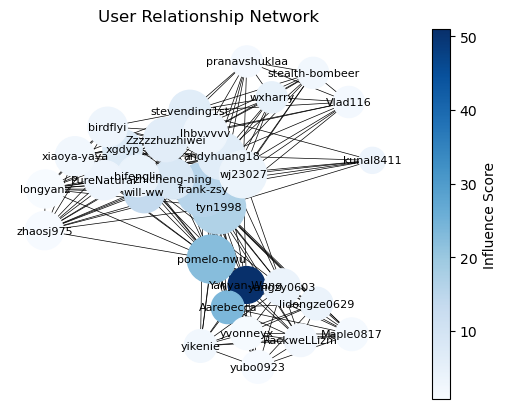

In [42]:
#4. 网络图的可视化
#a. 使用图论可视化工具绘制用户关系网络图，展示关键用户和他们的连接情况。
#b. 你可以对图中的节点按“影响力得分”进行着色，节点的大小则代表度数，尝试解释在图中哪些用户在社交网络中最具影响力。
import json
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

data = json.loads('{"nodes":[["Yanyan-Wang",50.95],["Aarebecca",23.82],["pomelo-nwu",22.36],["tyn1998",16.64],["frank-zsy",15.8],["will-ww",13.5],["zhicheng-ning",8.35],["xgdyp",7.58],["stevending1st",6.28],["andyhuang18",6.27],["Zzzzzhuzhiwei",6.21],["wxharry",4.79],["bifenglin",4.01],["yangzy0603",3.83],["lidongze0629",3.73],["wj23027",3.56],["PureNatural",3.37],["kunal8411",3.36],["birdflyi",3.28],["lhbvvvvv",3.12],["xiaoya-yaya",2.39],["stealth-bombeer",2.36],["yikenie",2.31],["RackweLLizm",2.28],["pranavshuklaa",1.79],["Vlad116",1.79],["Maple0817",1.63],["yvonneyx",1.22],["yubo0923",1.12],["zhaosj975",1],["longyanz",0.74]],"edges":[["Yanyan-Wang","Aarebecca",25.3],["Yanyan-Wang","pomelo-nwu",25.09],["Aarebecca","pomelo-nwu",24.84],["andyhuang18","tyn1998",15.28],["yangzy0603","pomelo-nwu",13.85],["bifenglin","will-ww",13.32],["tyn1998","pomelo-nwu",12.48],["yangzy0603","Aarebecca",11.92],["tyn1998","frank-zsy",11.87],["yangzy0603","Yanyan-Wang",11.85],["wj23027","andyhuang18",11.03],["zhicheng-ning","will-ww",10.82],["wj23027","tyn1998",10.64],["tyn1998","bifenglin",9.84],["tyn1998","Yanyan-Wang",9.62],["Zzzzzhuzhiwei","frank-zsy",9.52],["tyn1998","will-ww",9.15],["Zzzzzhuzhiwei","will-ww",8.83],["xgdyp","frank-zsy",8.44],["andyhuang18","will-ww",8.19],["lidongze0629","pomelo-nwu",8.1],["Zzzzzhuzhiwei","tyn1998",7.93],["andyhuang18","zhicheng-ning",7.88],["lhbvvvvv","tyn1998",7.84],["PureNatural","bifenglin",7.75],["zhicheng-ning","tyn1998",7.73],["yvonneyx","Aarebecca",7.73],["Zzzzzhuzhiwei","xgdyp",7.71],["xgdyp","PureNatural",7.67],["yvonneyx","pomelo-nwu",7.63],["will-ww","frank-zsy",7.62],["xgdyp","bifenglin",7.61],["xiaoya-yaya","bifenglin",7.42],["yvonneyx","Yanyan-Wang",7.39],["Zzzzzhuzhiwei","lhbvvvvv",7.37],["tyn1998","PureNatural",7.32],["PureNatural","frank-zsy",7.29],["Yanyan-Wang","lidongze0629",7.25],["yangzy0603","tyn1998",7.15],["wj23027","zhicheng-ning",7.1],["lhbvvvvv","andyhuang18",7.07],["PureNatural","will-ww",7.06],["birdflyi","xgdyp",6.99],["xgdyp","tyn1998",6.96],["lhbvvvvv","will-ww",6.92],["tyn1998","stevending1st",6.85],["stevending1st","frank-zsy",6.84],["birdflyi","frank-zsy",6.71],["Aarebecca","lidongze0629",6.58],["wxharry","tyn1998",6.54],["Zzzzzhuzhiwei","PureNatural",6.49],["bifenglin","frank-zsy",6.4],["tyn1998","Aarebecca",6.4],["zhicheng-ning","bifenglin",6.34],["andyhuang18","frank-zsy",6.29],["wj23027","will-ww",6.26],["Zzzzzhuzhiwei","birdflyi",6.22],["xiaoya-yaya","will-ww",6.19],["xgdyp","will-ww",6.14],["Zzzzzhuzhiwei","zhicheng-ning",6.11],["birdflyi","bifenglin",6.04],["birdflyi","PureNatural",6.01],["lhbvvvvv","frank-zsy",5.92],["yangzy0603","yvonneyx",5.84],["Zzzzzhuzhiwei","bifenglin",5.79],["yangzy0603","lidongze0629",5.6],["andyhuang18","bifenglin",5.59],["andyhuang18","wxharry",5.53],["wj23027","frank-zsy",5.48],["zhicheng-ning","frank-zsy",5.33],["Zzzzzhuzhiwei","andyhuang18",5.31],["birdflyi","tyn1998",5.19],["xiaoya-yaya","tyn1998",5.09],["birdflyi","will-ww",4.97],["lhbvvvvv","zhicheng-ning",4.97],["RackweLLizm","pomelo-nwu",4.97],["Zzzzzhuzhiwei","stevending1st",4.96],["RackweLLizm","Aarebecca",4.84],["xiaoya-yaya","xgdyp",4.75],["yikenie","pomelo-nwu",4.66],["zhicheng-ning","PureNatural",4.63],["yikenie","Aarebecca",4.55],["Zzzzzhuzhiwei","wj23027",4.53],["RackweLLizm","Yanyan-Wang",4.5],["lhbvvvvv","wj23027",4.43],["yangzy0603","RackweLLizm",4.29],["andyhuang18","stevending1st",4.28],["yikenie","Yanyan-Wang",4.25],["zhicheng-ning","xgdyp",4.23],["pranavshuklaa","tyn1998",4.19],["xiaoya-yaya","PureNatural",4.15],["xiaoya-yaya","zhicheng-ning",4.11],["bifenglin","pomelo-nwu",4.11],["tyn1998","lidongze0629",4.1],["lhbvvvvv","wxharry",4.08],["yangzy0603","yikenie",4.06],["longyanz","bifenglin",3.97],["pomelo-nwu","frank-zsy",3.96],["pranavshuklaa","wxharry",3.95],["yvonneyx","lidongze0629",3.93],["xgdyp","stevending1st",3.91],["yubo0923","pomelo-nwu",3.9],["yvonneyx","tyn1998",3.87],["wj23027","pomelo-nwu",3.86],["andyhuang18","PureNatural",3.83],["yubo0923","Aarebecca",3.82],["pranavshuklaa","andyhuang18",3.75],["longyanz","will-ww",3.69],["Zzzzzhuzhiwei","xiaoya-yaya",3.69],["lhbvvvvv","PureNatural",3.66],["wj23027","bifenglin",3.62],["yubo0923","Yanyan-Wang",3.61],["andyhuang18","pomelo-nwu",3.56],["lhbvvvvv","bifenglin",3.55],["lhbvvvvv","stevending1st",3.54],["stevending1st","will-ww",3.51],["stealth-bombeer","tyn1998",3.51],["birdflyi","stevending1st",3.48],["yangzy0603","yubo0923",3.47],["RackweLLizm","lidongze0629",3.4],["wj23027","stevending1st",3.37],["PureNatural","stevending1st",3.36],["stealth-bombeer","wxharry",3.35],["RackweLLizm","tyn1998",3.35],["xiaoya-yaya","birdflyi",3.33],["Maple0817","pomelo-nwu",3.32],["will-ww","pomelo-nwu",3.27],["Maple0817","Aarebecca",3.27],["yikenie","lidongze0629",3.26],["yvonneyx","RackweLLizm",3.24],["lhbvvvvv","xgdyp",3.23],["yikenie","tyn1998",3.21],["stealth-bombeer","andyhuang18",3.2],["Yanyan-Wang","Maple0817",3.11],["yvonneyx","yikenie",3.11],["zhicheng-ning","stevending1st",3.07],["tyn1998","Vlad116",3.05],["pranavshuklaa","lhbvvvvv",3.02],["birdflyi","zhicheng-ning",3.01],["yangzy0603","Maple0817",3.01],["longyanz","tyn1998",2.96],["longyanz","xiaoya-yaya",2.94],["wxharry","Vlad116",2.93],["yubo0923","lidongze0629",2.86],["xiaoya-yaya","frank-zsy",2.84],["zhaosj975","tyn1998",2.84],["yubo0923","tyn1998",2.83],["andyhuang18","Vlad116",2.81],["kunal8411","andyhuang18",2.78],["lhbvvvvv","birdflyi",2.78],["RackweLLizm","yikenie",2.77],["yubo0923","yvonneyx",2.75],["kunal8411","wj23027",2.74],["longyanz","zhicheng-ning",2.72],["stevending1st","bifenglin",2.71],["lhbvvvvv","stealth-bombeer",2.66],["pranavshuklaa","stealth-bombeer",2.6],["Maple0817","lidongze0629",2.54],["zhicheng-ning","pomelo-nwu",2.52],["tyn1998","Maple0817",2.51],["yubo0923","RackweLLizm",2.48],["andyhuang18","xgdyp",2.47],["yvonneyx","Maple0817",2.45],["yubo0923","yikenie",2.4],["lhbvvvvv","Vlad116",2.38],["PureNatural","pomelo-nwu",2.36],["wj23027","Yanyan-Wang",2.34],["longyanz","xgdyp",2.34],["pranavshuklaa","Vlad116",2.34],["longyanz","andyhuang18",2.33],["kunal8411","tyn1998",2.32],["xiaoya-yaya","andyhuang18",2.28],["longyanz","PureNatural",2.26],["xiaoya-yaya","pomelo-nwu",2.24],["RackweLLizm","Maple0817",2.23],["Zzzzzhuzhiwei","wxharry",2.22],["wj23027","PureNatural",2.21],["yikenie","Maple0817",2.17],["stealth-bombeer","Vlad116",2.11],["xgdyp","pomelo-nwu",2.1],["longyanz","pomelo-nwu",2.1],["Yanyan-Wang","frank-zsy",2.1],["wxharry","stevending1st",2.03],["kunal8411","zhicheng-ning",2.02],["yubo0923","Maple0817",1.99],["lhbvvvvv","xiaoya-yaya",1.98],["wj23027","xgdyp",1.87],["Zzzzzhuzhiwei","pranavshuklaa",1.87],["wj23027","xiaoya-yaya",1.85],["longyanz","wj23027",1.83],["yangzy0603","frank-zsy",1.77],["pranavshuklaa","stevending1st",1.73],["Zzzzzhuzhiwei","stealth-bombeer",1.72],["wj23027","wxharry",1.71],["kunal8411","stevending1st",1.69],["xiaoya-yaya","stevending1st",1.69],["zhaosj975","will-ww",1.65],["Zzzzzhuzhiwei","Vlad116",1.6],["stealth-bombeer","stevending1st",1.6],["Zzzzzhuzhiwei","longyanz",1.59],["zhaosj975","andyhuang18",1.56],["zhaosj975","bifenglin",1.54],["andyhuang18","birdflyi",1.51],["wxharry","frank-zsy",1.51],["Zzzzzhuzhiwei","pomelo-nwu",1.5],["Vlad116","stevending1st",1.5],["pranavshuklaa","wj23027",1.49],["zhaosj975","PureNatural",1.43],["stealth-bombeer","wj23027",1.4],["longyanz","birdflyi",1.36],["pranavshuklaa","frank-zsy",1.34],["birdflyi","pomelo-nwu",1.33],["wj23027","Vlad116",1.32],["yangzy0603","wj23027",1.31],["zhaosj975","zhicheng-ning",1.26],["stealth-bombeer","frank-zsy",1.26],["wj23027","birdflyi",1.25],["kunal8411","frank-zsy",1.2],["Vlad116","frank-zsy",1.2],["andyhuang18","Yanyan-Wang",1.14],["lhbvvvvv","pomelo-nwu",1.09],["zhaosj975","frank-zsy",1.09],["lhbvvvvv","zhaosj975",1.09],["zhaosj975","pomelo-nwu",1],["zhaosj975","wj23027",1],["Aarebecca","frank-zsy",0.97],["zhaosj975","xgdyp",0.93],["lhbvvvvv","longyanz",0.89],["lidongze0629","frank-zsy",0.89],["longyanz","frank-zsy",0.89],["yvonneyx","frank-zsy",0.88],["Yanyan-Wang","bifenglin",0.86],["RackweLLizm","frank-zsy",0.85],["yikenie","frank-zsy",0.84],["yangzy0603","andyhuang18",0.83],["longyanz","zhaosj975",0.83],["yubo0923","frank-zsy",0.81],["kunal8411","will-ww",0.79],["Maple0817","frank-zsy",0.78],["yangzy0603","bifenglin",0.67],["zhaosj975","birdflyi",0.67],["zhaosj975","xiaoya-yaya",0.67],["Zzzzzhuzhiwei","zhaosj975",0.67]]}')

G = nx.Graph()

for user, score in data['nodes']:
    G.add_node(user, influence=score)

for edge in data['edges']:
    user1, user2, weight = edge
    G.add_edge(user1, user2, weight=weight)

fig, ax = plt.subplots()
pos = nx.spring_layout(G)
node_sizes = [G.degree(user) * 50 for user in G.nodes()]
node_colors = [G.nodes[user]['influence'] for user in G.nodes()]

norm = plt.Normalize(vmin=min(node_colors), vmax=max(node_colors))
sm = plt.cm.ScalarMappable(cmap=plt.cm.Blues, norm=norm)
sm.set_array([])

nx.draw(G, pos, with_labels=True, node_size=node_sizes, node_color=node_colors, cmap=plt.cm.Blues, width=0.5, ax=ax, font_size=8)

cbar = plt.colorbar(sm, ax=ax, label='Influence Score')
plt.title("User Relationship Network")
plt.show()
